# lab2

# A. View the Data

In [4]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia-340-2025-fall-hh71225/5.12_Cybersecurity_(detail).csv') # load the data from s3
df.head() #show the top 5 rows

,Year,Date,Control_Set,Control,Control_Name,Control_Family_Code,Definition,Compliance_Score,Reporting_Date,ObjectId
0,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 1,Access Control,AC,Access to assets and associated facilities is ...,18,2022/12/31 07:00:00+00,1
1,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 2,Awareness and Training,AT,The organization’s personnel and partners are ...,23,2022/12/31 07:00:00+00,2
2,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 3,Audit and Accountability,AU,NaN,32,2022/12/31 07:00:00+00,3
3,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 4,"Assessment, Authorization, and Monitoring",CA,NaN,71,2022/12/31 07:00:00+00,4
4,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 5,Configuration Management,CM,NaN,77,2022/12/31 07:00:00+00,5


In [5]:
df.shape #show the number of rows and columns

(152, 10)

In [6]:
df.info() # shows the data types and number of null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 152 non-null    int64 
 1   Date                 152 non-null    object
 2   Control_Set          152 non-null    object
 3   Control              152 non-null    object
 4   Control_Name         152 non-null    object
 5   Control_Family_Code  40 non-null     object
 6   Definition           122 non-null    object
 7   Compliance_Score     152 non-null    int64 
 8   Reporting_Date       152 non-null    object
 9   ObjectId             152 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 12.0+ KB


In [7]:
df.describe() #statistical summary of the data

,Year,Compliance_Score,ObjectId
count,152.000000,152.000000,152.000000
mean,2018.940789,62.703947,76.500000
std,1.977468,18.647955,44.022721
min,2016.000000,18.000000,1.000000
25%,2017.000000,50.000000,38.750000
50%,2019.000000,63.500000,76.500000
75%,2021.000000,76.000000,114.250000
max,2022.000000,100.000000,152.000000


I have 10 columns and 152 rows. I have 3 numerical columns and 7 text columns. It seems as if there is not much data. 

# B. Clean the Data

In [8]:
df = df.rename(columns={"Compliance_Score": "Score"}) 
df.head()

,Year,Date,Control_Set,Control,Control_Name,Control_Family_Code,Definition,Score,Reporting_Date,ObjectId
0,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 1,Access Control,AC,Access to assets and associated facilities is ...,18,2022/12/31 07:00:00+00,1
1,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 2,Awareness and Training,AT,The organization’s personnel and partners are ...,23,2022/12/31 07:00:00+00,2
2,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 3,Audit and Accountability,AU,NaN,32,2022/12/31 07:00:00+00,3
3,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 4,"Assessment, Authorization, and Monitoring",CA,NaN,71,2022/12/31 07:00:00+00,4
4,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 5,Configuration Management,CM,NaN,77,2022/12/31 07:00:00+00,5


In [9]:
df.isnull().sum()

Year                     0
Date                     0
Control_Set              0
Control                  0
Control_Name             0
Control_Family_Code    112
Definition              30
Score                    0
Reporting_Date           0
ObjectId                 0
dtype: int64

In [10]:
df = df.dropna()
df.isnull().sum()

Year                   0
Date                   0
Control_Set            0
Control                0
Control_Name           0
Control_Family_Code    0
Definition             0
Score                  0
Reporting_Date         0
ObjectId               0
dtype: int64

I renamed my "Compliance Score" column to "Score". It seems like I had 0 missing values. 

# C. Manipulate the data

In [11]:
df['Year']

0     2022
1     2022
8     2022
15    2022
19    2022
20    2021
21    2021
28    2021
35    2021
39    2021
Name: Year, dtype: int64

In [12]:
df.sort_values(by='Control')

,Year,Date,Control_Set,Control,Control_Name,Control_Family_Code,Definition,Score,Reporting_Date,ObjectId
0,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 1,Access Control,AC,Access to assets and associated facilities is ...,18,2022/12/31 07:00:00+00,1
20,2021,2021/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 1,Access Control,AC,Access to assets and associated facilities is ...,72,2021/12/31 07:00:00+00,21
15,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 16,Risk Assessment,RA,The organization understands the cybersecurity...,67,2022/12/31 07:00:00+00,16
35,2021,2021/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 16,Risk Assessment,RA,The organization understands the cybersecurity...,67,2021/12/31 07:00:00+00,36
1,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 2,Awareness and Training,AT,The organization’s personnel and partners are ...,23,2022/12/31 07:00:00+00,2
21,2021,2021/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 2,Awareness and Training,AT,The organization’s personnel and partners are ...,82,2021/12/31 07:00:00+00,22
19,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 20,Supply Chain Risk Management,SR,The implementation of strategies to manage bot...,61,2022/12/31 07:00:00+00,20
39,2021,2021/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 20,Supply Chain Risk Management,SR,The implementation of strategies to manage bot...,63,2021/12/31 07:00:00+00,40
8,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 9,Maintenance,MA,Maintenance and repairs of industrial control ...,48,2022/12/31 07:00:00+00,9
28,2021,2021/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 9,Maintenance,MA,Maintenance and repairs of industrial control ...,46,2021/12/31 07:00:00+00,29


In [13]:
df[0:5] #slice by rows

,Year,Date,Control_Set,Control,Control_Name,Control_Family_Code,Definition,Score,Reporting_Date,ObjectId
0,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 1,Access Control,AC,Access to assets and associated facilities is ...,18,2022/12/31 07:00:00+00,1
1,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 2,Awareness and Training,AT,The organization’s personnel and partners are ...,23,2022/12/31 07:00:00+00,2
8,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 9,Maintenance,MA,Maintenance and repairs of industrial control ...,48,2022/12/31 07:00:00+00,9
15,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 16,Risk Assessment,RA,The organization understands the cybersecurity...,67,2022/12/31 07:00:00+00,16
19,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 20,Supply Chain Risk Management,SR,The implementation of strategies to manage bot...,61,2022/12/31 07:00:00+00,20


In [14]:
df[df['Year']>2015] # select rows by values 

,Year,Date,Control_Set,Control,Control_Name,Control_Family_Code,Definition,Score,Reporting_Date,ObjectId
0,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 1,Access Control,AC,Access to assets and associated facilities is ...,18,2022/12/31 07:00:00+00,1
1,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 2,Awareness and Training,AT,The organization’s personnel and partners are ...,23,2022/12/31 07:00:00+00,2
8,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 9,Maintenance,MA,Maintenance and repairs of industrial control ...,48,2022/12/31 07:00:00+00,9
15,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 16,Risk Assessment,RA,The organization understands the cybersecurity...,67,2022/12/31 07:00:00+00,16
19,2022,2022/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 20,Supply Chain Risk Management,SR,The implementation of strategies to manage bot...,61,2022/12/31 07:00:00+00,20
20,2021,2021/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 1,Access Control,AC,Access to assets and associated facilities is ...,72,2021/12/31 07:00:00+00,21
21,2021,2021/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 2,Awareness and Training,AT,The organization’s personnel and partners are ...,82,2021/12/31 07:00:00+00,22
28,2021,2021/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 9,Maintenance,MA,Maintenance and repairs of industrial control ...,46,2021/12/31 07:00:00+00,29
35,2021,2021/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 16,Risk Assessment,RA,The organization understands the cybersecurity...,67,2021/12/31 07:00:00+00,36
39,2021,2021/12/31 07:00:00+00,NIST SP 800-53 (Rev. 5),NIST 20,Supply Chain Risk Management,SR,The implementation of strategies to manage bot...,63,2021/12/31 07:00:00+00,40


I selected Year of when the cyber attack took place and it output cyber attacks after 2015.

<Axes: xlabel='Year'>

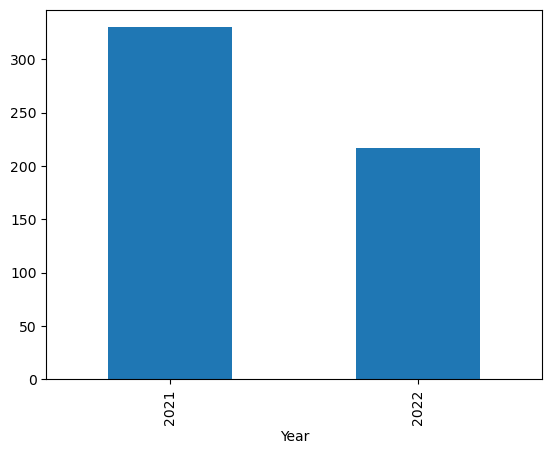

In [16]:
sum_score_by_year = df.groupby('Year')['Score'].sum() 
sum_score_by_year.nlargest(10).plot.bar() 

The groupby bar graph shows the year 2021 and 2022 with the score. Year 2021 had a higher score than 2022. 

<Axes: xlabel='Control_Name'>

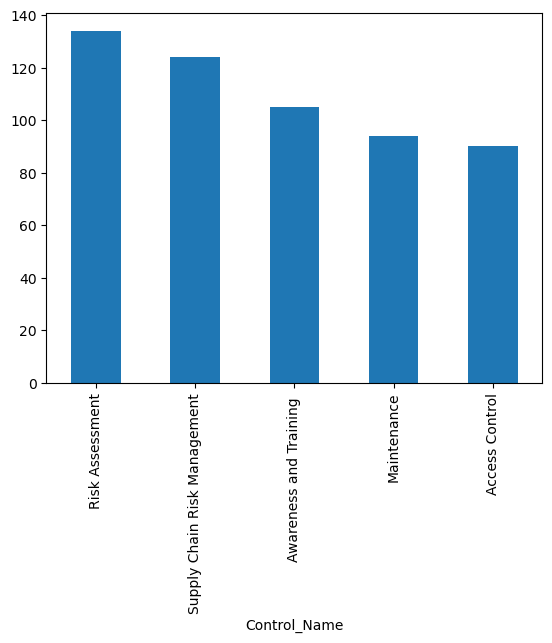

In [24]:
sum_scores_by_control_name = df.groupby('Control_Name')['Score'].sum() 
sum_scores_by_control_name.nlargest(10).plot.bar() 

The group by bar graph shows the score for each control name. The graph shows Risk Assessment has the highest score.
